In [1]:
# Did this push to my branch? I guess not?

# Project 1 Using Python, Pandas and Matplotlib
## Comparing Monthly Alcohol Sales, COVID Infection Rates and Shutdown Measures Across 16 U.S. States From May to June 2020
## Group 3: Phil, Rob, Diane, Gurupdesh
### The information on alcohol consumption in the U.S. during the period March 2020 through June 2020 can be  found at the National Institute on Alcohol Abuse and Alcoholism website:
summary: https://pubs.niaaa.nih.gov/publications/surveillance-covid-19/COVSALES.htm
### The data file "alcsales_June2020.xlsx" was downloaded from the above page, then saved as a renamed csv file (for import into Pandas) as "NIH_Alcohol_Sales_Thru_Jun2020.csv"
data file: https://pubs.niaaa.nih.gov/publications/surveillance-covid-19/alcsales_June2020.xlsx
### Definitions
Updated 08/27/2020
This file contains data on per capita alcohol sales from 16 states: Alaska, Arkansas, Colorado, Connecticut, Florida, Illinois, Kansas, Kentucky, Louisiana, Massachusetts, Missouri, North Dakota, Oregon, Texas, Virginia, and Wisconsin by type of alcoholic beverage from January 2017 through June 2020. Note: Monthly data are not available for spirits in Oregon, wine in Kansas, and beer in Louisiana and Wisconsin. This file includes	updates to sales estimates from the previous May 2020 file. Figures were rounded for display purposes after calculation.

For an understanding of the methods used in calculating per capita gallons of ethanol (pure alcohol), see: Slater, M.E., and Alpert, H.R., 2020. Surveillance Report #115: Apparent Per Capita Alcohol Consumption: National, State, and Regional Trends, 1977-2018. Bethesda, MD: NIAAA. Available to download in PDF and HTM formats at: http://pubs.niaaa.nih.gov/publications/surveillance.htm

In [56]:
# Import Dependencies
import os
import csv
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [57]:
# Create reference to the csv(s) and print file names/locations and link to original data (print url link)
covid_tracking_path = "Data/COVID_Tracking_By_State_Thru_2020_10_09.csv"
print(f"COVID Tracking by State Data: {covid_tracking_path}, URL: ")
nih_alcohol_path = "Data/NIH_Alcohol_Sales_Thru_Jun2020.csv"
print(f"NIH Alcohol Consumption Data: {nih_alcohol_path}, URL: ")

# Need to create a csv data set/file for the New York Times shutdown by state information and develop a scoring methodology
# Print url/link to console/terminal

COVID Tracking by State Data: Data/COVID_Tracking_By_State_Thru_2020_10_09.csv, URL: 
NIH Alcohol Consumption Data: Data/NIH_Alcohol_Sales_Thru_Jun2020.csv, URL: 


In [58]:
# Import csv files into Pandas data frame
covid_df = pd.read_csv(covid_tracking_path)

# Print column headers of the dataframe
# covid_df.columns
covid_df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,10/9/2020,AK,A,60.0,60.0,0,NaN,NaN,NaN,51.0,...,493070.0,1899,NaN,NaN,NaN,NaN,NaN,0,493070.0,1899
1,10/9/2020,AL,A,2653.0,2496.0,16,157.0,17989.0,17989.0,816.0,...,1196452.0,11742,NaN,NaN,59957.0,NaN,NaN,0,1196452.0,11742
2,10/9/2020,AR,A+,1503.0,1359.0,0,144.0,5805.0,5805.0,546.0,...,1111526.0,0,NaN,21856.0,NaN,25538.0,NaN,0,1111526.0,0
3,10/9/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,10/9/2020,AZ,A+,5746.0,5460.0,3,286.0,20199.0,20199.0,706.0,...,1543445.0,12350,300333.0,NaN,NaN,NaN,1543445.0,12350,NaN,0


In [59]:
# Rename columns for readability
covid_df = covid_df.rename(columns={
    'date':'Date', 
    'state':'State',
    'dataQualityGrade':'Data Quality Grade',
    'death':'Deaths',
    'deathConfirmed':'Deaths Confirmed',
    'deathIncrease':'Increase in Deaths',
})
covid_df.head()

,Date,State,Data Quality Grade,Deaths,Deaths Confirmed,Increase in Deaths,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,10/9/2020,AK,A,60.0,60.0,0,NaN,NaN,NaN,51.0,...,493070.0,1899,NaN,NaN,NaN,NaN,NaN,0,493070.0,1899
1,10/9/2020,AL,A,2653.0,2496.0,16,157.0,17989.0,17989.0,816.0,...,1196452.0,11742,NaN,NaN,59957.0,NaN,NaN,0,1196452.0,11742
2,10/9/2020,AR,A+,1503.0,1359.0,0,144.0,5805.0,5805.0,546.0,...,1111526.0,0,NaN,21856.0,NaN,25538.0,NaN,0,1111526.0,0
3,10/9/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,10/9/2020,AZ,A+,5746.0,5460.0,3,286.0,20199.0,20199.0,706.0,...,1543445.0,12350,300333.0,NaN,NaN,NaN,1543445.0,12350,NaN,0


In [60]:
# RG adding multiple columns with date split by month, day, year
monthcol = []
daycol = []
yearcol = []

for column in covid_df["Date"]:
    splitdate = column.split('/')
    monthcol.append(splitdate[0])
    daycol.append(splitdate[1])
    yearcol.append(splitdate[2])


# Month = {"Month": monthcol}
# Day = {"Day": daycol}
# Year = {"Year": yearcol}

covid_df["Month"] = monthcol
covid_df["Day"] = daycol
covid_df["Year"] = yearcol

covid_df.head()

,Date,State,Data Quality Grade,Deaths,Deaths Confirmed,Increase in Deaths,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Month,Day,Year
0,10/9/2020,AK,A,60.0,60.0,0,NaN,NaN,NaN,51.0,...,NaN,NaN,NaN,NaN,0,493070.0,1899,10,9,2020
1,10/9/2020,AL,A,2653.0,2496.0,16,157.0,17989.0,17989.0,816.0,...,NaN,59957.0,NaN,NaN,0,1196452.0,11742,10,9,2020
2,10/9/2020,AR,A+,1503.0,1359.0,0,144.0,5805.0,5805.0,546.0,...,21856.0,NaN,25538.0,NaN,0,1111526.0,0,10,9,2020
3,10/9/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1616.0,0,10,9,2020
4,10/9/2020,AZ,A+,5746.0,5460.0,3,286.0,20199.0,20199.0,706.0,...,NaN,NaN,NaN,1543445.0,12350,NaN,0,10,9,2020


In [61]:
# RG cleaning columns to remove unnecessary data
covidclean_df = covid_df[['State','Month','Day','Year','positive','totalTestResults']]

covidclean_df.head()

,State,Month,Day,Year,positive,totalTestResults
0,AK,10,9,2020,10176.0,493070.0
1,AL,10,9,2020,163465.0,1196452.0
2,AR,10,9,2020,90145.0,1111526.0
3,AS,10,9,2020,0.0,1616.0
4,AZ,10,9,2020,224084.0,1543445.0


In [62]:
# Print values for 'state'
# covid_df['state'].value_counts()

In [63]:
# DATA CLEANING: Replace 'state' abbreviation with State names for readability
# Start with the 16 states that have alcohol consumption data
covidclean_df['State'] = covidclean_df['State'].replace({
    'AK':'Alaska',
    'AR':'Arkansas',
    'CO':'Colorado',
    'CT':'Connecticut',
    'FL':'Florida',
    'IL':'Illinois',
    'KS':'Kansas',
    'KY':'Kentucky',
    'LA':'Louisiana',
    'MA':'Massachusetts',
    'MO':'Missouri',
    'ND':'North Dakota',
    'OR':'Oregon',
    'TX':'Texas',
    'VA':'Virginia',
    'WI':'Wisconsin',
    'WA':'Washington',
    'NJ':'New Jersey',
    'MI':'Michigan',
    'RI':'Rhode Island',
    'AZ':'Arizona',
    'HI':'Hawaii',
    'NC':'North Carolina',
    'CA':'California',
    'GA':'Georgia',
    'SC':'South Carolina',
    'NY':'New York',
    'NH':'New Hampshire',
    'MD':'Maryland',
    'NV':'Nevada',
    'TN':'Tennesee',
    'NE':'Nebraska',
    'OH':'Ohio',
    'DC':'District of Columbia',
    'IA':'Iowa',
    'NM':'New Mexico',
    'WV':'West Virginia',
    'IN':'Indiana',
    'MS':'Mississippi',
    'MN':'Minnesota',
    'PA':'Pennsylvania',
    'VT':'Vermont',
    'DE':'Delaware',
    'MT':'Montana',
    'AL':'Alabama',
    'ME':'Maine',
    'WY':'Wyoming',
    'UT':'Utah',
    'ID':'Idaho',
    'OK':'Oklahoma',
    'SD':'South Dakota',
    'VI':'Virgin Islands',
    'AS':'American Samoa',
    'GU':'Guam',
    'MP':'Northern Mariana Islands',
    'PR':'Puerto Rico'    
    }
)
covidclean_df['State'].value_counts()

<ipython-input-63-2a9c8407a9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidclean_df['State'] = covidclean_df['State'].replace({


Massachusetts               262
Washington                  262
New Jersey                  243
Virginia                    226
Michigan                    223
Rhode Island                223
South Carolina              220
Florida                     220
Georgia                     220
New Hampshire               220
Hawaii                      220
Oregon                      220
North Carolina              220
Wisconsin                   220
New York                    220
Arizona                     220
Illinois                    220
California                  220
Texas                       220
Ohio                        219
Colorado                    219
Nevada                      219
Maryland                    219
District of Columbia        219
Tennesee                    219
Nebraska                    219
Arkansas                    218
Pennsylvania                218
Indiana                     218
Kentucky                    218
Vermont                     218
Iowa    

In [64]:
# groupby state and month
groupcovid_df = covidclean_df.groupby(["State","Month"]).max()
groupcovid_df = groupcovid_df[['Year','positive','totalTestResults']]

groupcovid_df.head()

Year  positive  totalTestResults
State   Month                                  
Alabama 10     2020  163465.0         1196452.0
        3      2020     981.0            7279.0
        4      2020    7019.0           87196.0
        5      2020   17903.0          221307.0
        6      2020   38045.0          406143.0

In [65]:
# remove states that are not in the other dataset
groupcovidclean_df = groupcovid_df.reset_index()
groupcovidclean_df

,State,Month,Year,positive,totalTestResults
0,Alabama,10,2020,163465.0,1196452.0
1,Alabama,3,2020,981.0,7279.0
2,Alabama,4,2020,7019.0,87196.0
3,Alabama,5,2020,17903.0,221307.0
4,Alabama,6,2020,38045.0,406143.0
...,...,...,...,...,...
449,Wyoming,5,2020,903.0,24393.0
450,Wyoming,6,2020,1487.0,36474.0
451,Wyoming,7,2020,2726.0,53299.0
452,Wyoming,8,2020,3842.0,76273.0


In [66]:
statelist = ['Alaska',
    'Arkansas',
    'Colorado',
    'Connecticut',
    'Florida',
    'Illinois',
    'Kansas',
    'Kentucky',
    'Louisiana',
    'Massachusetts',
    'Missouri',
    'North Dakota',
    'Oregon',
    'Texas',
    'Virginia',
    'Wisconsin']

groupcovidclean_df = groupcovidclean_df.loc[groupcovidclean_df['State'].map(lambda x: x in statelist),:].reset_index()
groupcovidclean_df

,index,State,Month,Year,positive,totalTestResults
0,8,Alaska,10,2020,10176.0,493070.0
1,9,Alaska,3,2020,119.0,3713.0
2,10,Alaska,4,2020,355.0,19119.0
3,11,Alaska,5,2020,434.0,51695.0
4,12,Alaska,6,2020,940.0,112185.0
...,...,...,...,...,...,...
126,441,Wisconsin,5,2020,20564.0,270667.0
127,442,Wisconsin,6,2020,31662.0,571201.0
128,443,Wisconsin,7,2020,56934.0,939083.0
129,444,Wisconsin,8,2020,80568.0,1253422.0


In [67]:
# Import csv files into Pandas data frame
alcohol_df = pd.read_csv(nih_alcohol_path)

# Print column headers of the dataframe
alcohol_df.columns

Index(['Year', 'Month', 'FIPS', 'Beverage', 'Gallons', 'Ethanol', 'Population',
       'PerCapita', 'PerCapita3yr', 'PctChange'],
      dtype='object')

In [68]:
# Print values for 'FIPS' to show the codes used to identify States
alcohol_df['FIPS'].value_counts()

48    126
38    126
29    126
25    126
21    126
17    126
12    126
5     126
2     126
51    125
8     123
9     120
55     84
41     84
22     84
20     84
Name: FIPS, dtype: int64

In [69]:
# DATA CLEANING: Replace FIPS Code with State names for readability
alcohol_df['FIPS'] = alcohol_df['FIPS'].replace({
    2:'Alaska',
    5:'Arkansas',
    8:'Colorado',
    9:'Connecticut',
    12:'Florida',
    17:'Illinois',
    20:'Kansas',
    21:'Kentucky',
    22:'Louisiana',
    25:'Massachusetts',
    29:'Missouri',
    38:'North Dakota',
    41:'Oregon',
    48:'Texas',
    51:'Virginia',
    55:'Wisconsin'
    }
)
alcohol_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,Alaska,1,103645,42598,593378,0.0718,NaN,NaN
1,2017,1,Arkansas,1,402885,165586,2455022,0.0674,NaN,NaN
2,2017,1,Colorado,1,733857,301615,4634346,0.0651,NaN,NaN
3,2017,1,Connecticut,1,412100,169373,3015481,0.0562,NaN,NaN
4,2017,1,Florida,1,2770686,1138752,17722275,0.0643,NaN,NaN


In [70]:
# DATA CLEANING: Replace Beverage code with Beverage names for readability
alcohol_df['Beverage'] = alcohol_df['Beverage'].replace({
    1:'Spirits',
    2:'Wine',
    3:'Beer'
    }
)
alcohol_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN
1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN
2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN
3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN
4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN


In [71]:
# Rename 'FIPS' to 'State' and 'Beverage' to 'Beverage Type' for Readability
alcohol_df = alcohol_df.rename(columns={
    "FIPS":"State", 
    "Beverage":"Beverage Type"
})
alcohol_df.head()

,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN
1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN
2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN
3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN
4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN


In [72]:
# convert all month from object to integer in covid data frame

def df_col_conv(df,cols,type_):
    type_obj = {col : type_  for col in cols}
    {"Month": "int64","Year": "int64"}
    return df.astype(type_obj)

#groupcovidclean_df['Month'] = groupcovidclean_df['Month'].map(lambda x: int(x))

groupcovidclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             131 non-null    int64  
 1   State             131 non-null    object 
 2   Month             131 non-null    object 
 3   Year              131 non-null    object 
 4   positive          128 non-null    float64
 5   totalTestResults  131 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.3+ KB


In [73]:
groupcovidclean_df = df_col_conv(groupcovidclean_df,['Month','Year'],'int64')

In [74]:
# Merge groupcovidclean_df and alcohol_df on 'State'
merged_df = pd.merge(alcohol_df, groupcovidclean_df, how="left", on=("State","Month","Year"))
merged_df.head()

,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults
0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN
1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN
2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN
3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN
4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN


In [75]:
# add column with COVID per pop numbers
merged_df["Positivity Rate"] = ((merged_df["positive"].fillna(.00000001) / merged_df["totalTestResults"].fillna(.000000001))*100)\
    .map(lambda x: x if x <= 100 else 0).round(2)
merged_df

,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate
0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN,0.00
1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN,0.00
2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN,0.00
3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN,0.00
4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2020,6,Massachusetts,Beer,10335283,465088,5862386,0.0793,0.0913,-0.1312,190.0,108882.0,1103550.0,9.87
1834,2020,6,Missouri,Beer,11099851,499493,5077875,0.0984,0.1056,-0.0682,222.0,21551.0,424214.0,5.08
1835,2020,6,North Dakota,Beer,2091390,94113,617880,0.1523,0.1664,-0.0844,295.0,3574.0,178468.0,2.00
1836,2020,6,Oregon,Beer,7969948,358648,3547474,0.1011,0.1135,-0.1092,327.0,8656.0,237634.0,3.64


In [76]:
# create a csv with the merged, cleaned data

merged_df.to_csv(NIHmergedwithCOVIDdata.csv)

NameError: name 'NIHmergedwithCOVIDdata' is not defined

In [77]:
# Filter dataframe to only "my" states: Florida, Illinois, Kansas and Kentucky (?)

In [78]:
merged_df

,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate
0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN,0.00
1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN,0.00
2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN,0.00
3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN,0.00
4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2020,6,Massachusetts,Beer,10335283,465088,5862386,0.0793,0.0913,-0.1312,190.0,108882.0,1103550.0,9.87
1834,2020,6,Missouri,Beer,11099851,499493,5077875,0.0984,0.1056,-0.0682,222.0,21551.0,424214.0,5.08
1835,2020,6,North Dakota,Beer,2091390,94113,617880,0.1523,0.1664,-0.0844,295.0,3574.0,178468.0,2.00
1836,2020,6,Oregon,Beer,7969948,358648,3547474,0.1011,0.1135,-0.1092,327.0,8656.0,237634.0,3.64


In [79]:
# PZ Creating Necessary Data Visualizations

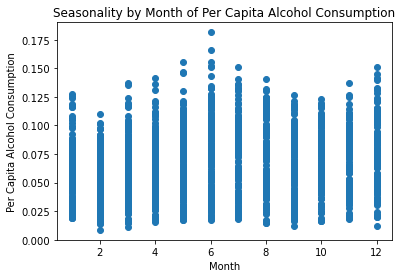

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

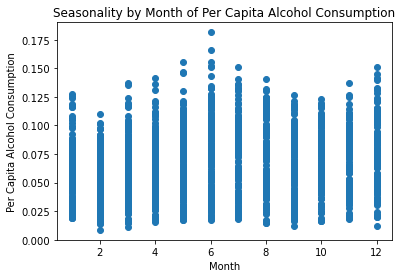

In [88]:
# Scatter of month vs. PerCapita Alcohol Consumption

x = merged_df["Month"]
y = merged_df["PerCapita"]

plt.title("Seasonality by Month of Per Capita Alcohol Consumption")
plt.xlabel("Month")
plt.ylabel("Per Capita Alcohol Consumption")

plt.scatter(x,y)

# plt.savefig("output_data/latvtemp.png")

plt.show(x,y)


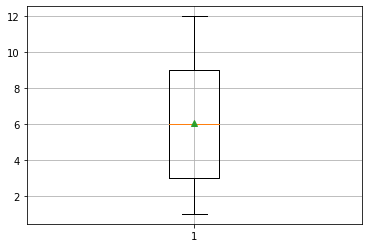

In [95]:
# Generate a box plot of month vs. PerCapita Alcohol Consumption
plt.boxplot(x, showmeans=True)
plt.grid()
plt.show()



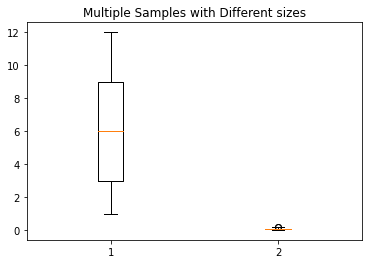

Text(0, 0.5, 'PerCapita')

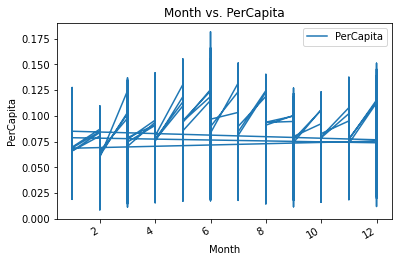

In [96]:
lines = merged_df.plot(subplots=True,kind="line", x='Month', y='PerCapita')

plt.title("Month vs. PerCapita")
plt.xlabel("Month")
plt.ylabel("PerCapita")

Text(0, 0.5, 'PerCapita')

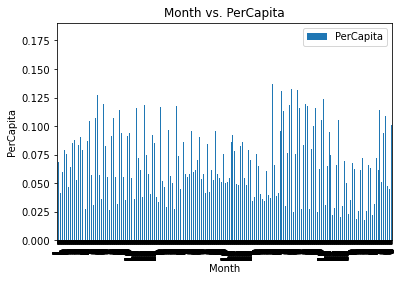

In [97]:
lines = merged_df.plot(subplots=True,kind="bar", x='Month', y='PerCapita')

plt.title("Month vs. PerCapita")
plt.xlabel("Month")
plt.ylabel("PerCapita")